# 1. Tensorflow와 Keras


텐서플로는 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리이다. 딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다는 것이다. GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 된다.

- 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리이다.
- 텐서플로에는 저수준 API와 고수준 API가 있는데, 케라스가 텐서플로의 고수준 API이다.
- 케라스는 2015년 3월 프랑소와 숄레가 만든 딥러닝 라이브러리로, GPU를 사용하여 인공 신경망을 훈련한다.
- 케라스 라이브러리는 직접 GPU연산을 수행하지는 않지만, GPU연산을 수행하는 다른 라이브러리(텐서플로, 씨아노,CNTK 등)를 백엔드로 사용한다.
- 
> 결론적으로, Keras가 텐서플로우를 설치하라고 하는 것은 Keras가 작동하기 위해 텐서플로우라는 "계산 엔진"이 필요하기 때문입니다.


### 케라스

케라스는 거의 모든 딥러닝 모델을 간편하게 만들 수 있는 프레임워크
 - 동일한 코드로 CPU와 GPU 에서 실행 가능와 쉬운 API 
 - CNN, RNN 등 지원
 - 다중 입력, 다중 출력 모델, 층의 공유, 모델 공유 등 다양한 망 구성 가능
 - Generative Adversarial Network(GAN) 부터 뉴럴 튜링 머신까지 어떤 딥러닝 모델도 가능하다.
 - MIT 라이센스!
 

<img src='https://pyimagesearch.com/wp-content/uploads/2019/10/keras_vs_tfdotkeras_relationship.png' width=600>

### Keras3

Keras3는 Keras 코드 기반을 완전히 재작성하여 모듈화된 백엔드 아키텍처 위에 다시 구축했으며 기존 TensorFlow뿐만 아니라 JAX, PyTorch 위에서 Keras 워크플로우를 실행할 수 있게 됩니다.

 - Keras3는 TensorFlow, JAX, PyTorch와 함께 전체 Keras API를 구현하고 사용할 수 있도록 합니다.
 - kerase.ops를 사용하면 NumPy API처럼 사용할 수 있게 됩니다. NumPy와 동일한 함수와 동일한 인자를 갖추고 있고, ops.matmul, ops.sum, ops.stack, ops.einsum 등과 같은 함수를 사용할 수 있습니다. 그리고 ops.softmax, ops.binary_crossentropy, ops.conv와 같이 NumPy에는 없지만 신경망에 특화된 함수도 제공합니다.

- Keras는 고수준(high-level) API입니다. Keras는 딥러닝 모델을 쉽고 빠르게 만들 수 있도록 추상화된 인터페이스를 제공합니다. 복잡한 계산 그래프를 직접 다룰 필요 없이 레이어를 쌓고 모델을 컴파일하는 등의 작업을 할 수 있습니다.


<img src='https://miro.medium.com/v2/resize:fit:1400/0*AZa82jXFTYv2FtW_.png' width=600>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
# from tensorflow import keras  # 텐서플로 2.x 버전
import keras
print(tf.__version__, keras.__version__)

2025-07-22 07:48:52.603122: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-22 07:48:52.637896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753138132.672259  175860 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753138132.684127  175860 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753138132.716848  175860 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0 3.10.0


> 내용중 `tf.keras` 와 `keras` 구문은 같다고 보면 된다.

In [3]:
# Google Colab 운영체제 확인
# import platform
# print(platform.platform())

In [4]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm
%matplotlib inline

# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
# plt.title('한글 타이틀...')

## backend  utils

 - https://keras.io/api/utils/backend_utils/

Keras는 자체적으로 복잡한 계산을 수행하지 않습니다. Keras는 사용자가 정의한 모델을 실제 연산으로 변환하여 실행하기 위해 텐서플로우(TensorFlow), 파이토치(PyTorch), **자악스(JAX)**와 같은 저수준(low-level) 딥러닝 프레임워크의 힘을 빌립니다. 과거에는 Theano와 CNTK도 지원했지만, 지금은 주로 텐서플로우가 기본 백엔드로 사용됩니다.

- TensorFlow는 Keras의 기본 백엔드입니다. Keras를 설치하면 특별히 설정하지 않는 한 텐서플로우를 기본 계산 엔진으로 사용하도록 되어 있습니다. 따라서 Keras가 모델을 빌드하고 훈련하는 데 필요한 실제 수학적 연산과 GPU 가속 등을 텐서플로우에게 위임하는 것입니다.


In [5]:
keras.backend.backend()  # `"tensorflow"`, `"torch"`, or `"jax"`.

'tensorflow'

In [6]:
from keras import backend as K
K.backend()

'tensorflow'

In [7]:
K.floatx()

'float32'

In [8]:
K.epsilon()

1e-07

In [9]:
K.image_data_format()  # channels_last --> (samples, width, height, channel)

'channels_last'

이런 backend 정보는  keras.json 파일에 설정되어있다.

```
> cat .\.keras\keras.json
{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}
```

 사용하고 싶은 백엔드 엔진에 따라 아래와 같이 keras.json파일을 수정하고  재실행하면 된다.

ex) theano 를 백엔드 엔진으로 사용

```json
{
    "backend": "theano",
    "floatx": "float32",
    "epsilon": 1e-07,
    "image_data_format": "channels_last"
}
```

 - image_data_format: This determines the data format convention followed by Keras. It is a string that takes one of the two values: "channels_last" or "channels_first".
 - epsilon: This refers to a float, a numeric constant that avoids zero division in some operations.
 - floatx:  This is a string, which can take values: "float16", "float32", or "float64".
 - backend: This is a string, "tensorflow" , "theano", or "cntk".
 - backend field : "theano", "tensorflow", or "cntk".cntk".

### 활성화 함수

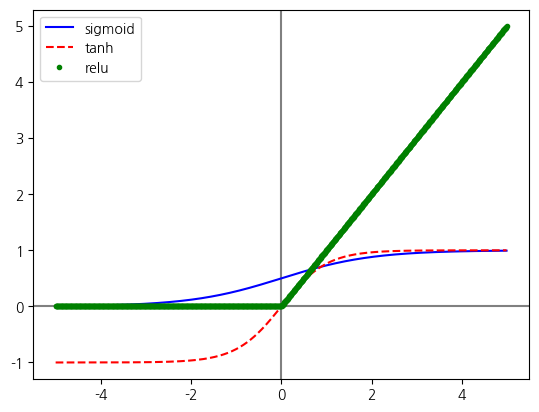

In [10]:
# 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

# 2. Keras 신경망 구현

Keras로 신경망을 구성해 퍼셉트론의 한계인 AND, OR, Xor 연산 수행해 보자

## 01. 랜덤한 수 생성



기술적으로 신경망은 하나 이상의 입력에 대해 가중치를 연산 결과를 활성화 함수에 의해 출력하는 것이다.

![image.png](https://i.imgur.com/Vy1wreM.jpg)

균일분포(Uniform Distribution) 난수

 - 최소-최대 값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 발생.


In [11]:
# 랜덤한 수 얻기 (균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

I0000 00:00:1753138138.259542  175860 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1626 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


tf.Tensor([0.02553976], shape=(1,), dtype=float32)


In [12]:
keras.random.uniform([1], 0, 1)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7054441], dtype=float32)>

In [13]:
type(rand)

tensorflow.python.framework.ops.EagerTensor

In [14]:
# `랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.98527837 0.43116295 0.6485524  0.07800508], shape=(4,), dtype=float32)


정규분포(Uniform Distribution) 난수
 - 0~1 사이 양극단은 낮고 가운데는 종모양의 난수
 - https://www.tensorflow.org/api_docs/python/tf/random/normal 


In [15]:
# 정규 분포 난수
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.28108376  0.4025486  -1.860511    0.7166829 ], shape=(4,), dtype=float32)


In [16]:
# 정규 분포 난수
rand = keras.random.normal([4],0,1)
print(rand)

tf.Tensor([-1.2323042   0.46733204  0.48627755  0.39109138], shape=(4,), dtype=float32)


## 02. 뉴런 만들기

<img src='https://i.imgur.com/s7fHO7r.jpeg' width=500>

시그모이드 함수 선언

In [17]:
# sigmoid 함수
import numpy as np
import math


def sigmoid(x):
    return 1 / (1 + math.exp(-x))

뉴런에 임의의 수를 입력

시그모이드 입력에 x 값고 임의의 가중치 w로 정규분포한 값을 입력하면 출력은 시그모이드 계산 결과이다. 

In [18]:
# 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)

output = sigmoid(x * w)
print(output)

0.5661271490827406


#### softmax

활성화 함수로 softmax를 쓰는데 소프트맥스 함수는 여러 유닛의 출력값을 정규화하기 위한 것이다. 

 - [참고 Softmax 함수](/my/nbconvert/html/%EC%8B%9C%EC%9E%91%ED%95%98%EC%84%B8%EC%9A%94_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B02/%EC%B0%B8%EA%B3%A0-%ED%99%9C%EC%84%B1%ED%99%94.ipynb?download=false#Softmax-%ED%95%A8%EC%88%98)



지수 함수는 큰 값을 강조하고 작은 값을 약화하는 효과가 가있다ㅣ. 소프트맥스는 분류 문제나 언어 RNN 에서 다음 토큰 예측, 강화 학습에서 에이전트 행동 확률을 구하는 등 결과 값으로 확률이 필요한 다양한 분야에서 쓰인다.

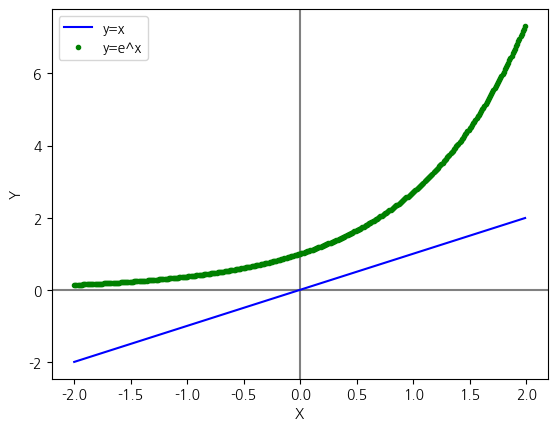

In [19]:
#  SoftMax 그래프
import matplotlib.pyplot as plt
import math
import numpy as np

x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

실제 출력과 기대 출력의 차이
 - 손실함수: 에러
 - 뉴런 학습은 이 에러가 0에 가까와 지게 해서 기대 값에 가깝운 값을 얻는 것

In [20]:
# 에러 = 기대출력 - 출력
y - output

-0.5661271490827406

#### 경사하강법 적용

손실함수를 최적화 하는 방법으로 경사하강법을 사용
 - 가중치에 입력, 에러 및 학습률을 곱해서 더해준다.
 
```
가중치 + 입력 x 학습률 x 에러
  학습률(ɑ) : w 업데이트 정도
```

x=0 일 때 y=1 을 얻는 뉴런의 학습

In [21]:
# x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


### 편향

 - 입력이 0으로 치우쳐서 $x\gt0$ 인 상태를 유지하고, 치우침을 방지할 편향(bias)가 필요 


<img src='https://i.imgur.com/Lv4iHBC.png' width='500'>

In [22]:
#  x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1

w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.08607957532100019 0.9139204246789998
199 0.04758971998969652 0.9524102800103035
299 0.03263802196844534 0.9673619780315547
399 0.024771467359418375 0.9752285326405816
499 0.019937069781984396 0.9800629302180156
599 0.01667098729926919 0.9833290127007308
699 0.01431892210570429 0.9856810778942957
799 0.01254544032952254 0.9874545596704775
899 0.011160967377831676 0.9888390326221683
999 0.010050522959072383 0.9899494770409276


## 03. 첫번째 신경망 네트워크 : AND

In [23]:
# True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [24]:
# 3.16 첫번째 신경망 네트워크 : AND
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

In [25]:
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum, output)

199 -0.11118761287487827 0.013464993992459175
399 -0.06601360616988333 0.0025056253524595464
599 -0.04683311575715359 0.0008302376527433073
799 -0.036184540823422914 0.000365555505314859
999 -0.029426338535781405 0.00019063313919129022
1199 -0.02476691602253432 0.00011120182641916041
1399 -0.02136482184744751 7.023745667129397e-05
1599 -0.018775331542306952 4.7074512402195934e-05
1799 -0.01673767946666576 3.303149412192246e-05
1999 -0.015095666569720292 2.404074385262834e-05


In [26]:
w, b  # 해로 구한 기울기, 절편

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([6.971102 , 6.9742427], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-10.635739], dtype=float32)>)

이렇게 학습한 네트워크가 정상적으로 동작하는지 확인해 보자.


이렇게 얻은 값에 시그모이드를 취하면 최종값이 된다. 중간 합계와 최종 출력을 평가해 보면, 가중치 2 값으로 중간값 계산이 0에 가까와 지기 때문에 시그모이드 적용한 출력이 0.5에 가까와 지는 것이다.

In [27]:
# AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9647568731855092
X: [1 0] Y: [0] Output: 0.024973799472182635
X: [0 1] Y: [0] Output: 0.02505038394526248
X: [0 0] Y: [0] Output: 2.4040675073260398e-05


In [28]:
# AND 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

X: [1 1] Y: [1] Sum: tf.Tensor([3.3096056], shape=(1,), dtype=float32) Output: 0.9647568731855092
X: [1 0] Y: [0] Sum: tf.Tensor([-3.664637], shape=(1,), dtype=float32) Output: 0.024973799472182635
X: [0 1] Y: [0] Sum: tf.Tensor([-3.6614966], shape=(1,), dtype=float32) Output: 0.02505038394526248
X: [0 0] Y: [0] Sum: tf.Tensor([-10.635739], shape=(1,), dtype=float32) Output: 2.4040675073260398e-05


In [29]:
w.numpy(), b.numpy()

(array([6.971102 , 6.9742427], dtype=float32),
 array([-10.635739], dtype=float32))

## 04. 두번째 신경망 네트워크 : OR

In [30]:
# 두번째 신경망 네트워크 : OR
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)


In [31]:
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.05933493290226416
399 -0.028399664460116963
599 -0.018527782951550553
799 -0.013692638556683845
999 -0.010836471093859178
1199 -0.008955779669553347
1399 -0.007625882987817446
1599 -0.006637218639571479
1799 -0.0058733971436357515
1999 -0.0052652995989196545


In [32]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

X: [1 1] Y: [1] Sum: tf.Tensor([12.720897], shape=(1,), dtype=float32) Output: 0.9999970119803335
X: [1 0] Y: [1] Sum: tf.Tensor([4.5517426], shape=(1,), dtype=float32) Output: 0.9895613092320448
X: [0 1] Y: [1] Sum: tf.Tensor([4.549761], shape=(1,), dtype=float32) Output: 0.9895408185801534
X: [0 0] Y: [0] Sum: tf.Tensor([-3.6193936], shape=(1,), dtype=float32) Output: 0.02609948470319316


평가를 해본 결과 중간 계산 값이 1보다 큰 값은 출력 Y 값은 1 근처 임을 알 수 있다.

## 05. 세번째 신경망 네트워크 : XOR

In [33]:
# 세번째 신경망 네트워크 : XOR

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

In [34]:
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.005954198799315691
399 -0.00024213007236240092
599 -9.843176507873252e-06
799 -3.9462123901934376e-07
999 4.653552765354618e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


에러 값이 줄다가 어느 순간 변하지 않는다.

XOR 네트워크의 평가


w, b 값을 확인해 보면 아래 같아서 w의 첫번째 입력이 영향을 크게 미치고, 편향도 거의 영향이 없을 것 으로 보인다. 


In [35]:
print('w:', w)
print('b:', b)

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)



이렇게 얻은 값에 시그모이드를 취하면 최종값이 된다. 중간 합계와 최종 출력을 평가해 보면, 가중치 2 값으로 중간값 계산이 0에 가까와 지기 때문에 시그모이드 적용한 출력이 0.5에 가까와 지는 것이다.

In [36]:
# XOR 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

X: [1 1] Y: [0] Sum: tf.Tensor([0.05128175], shape=(1,), dtype=float32) Output: 0.5128176286712095
X: [1 0] Y: [1] Sum: tf.Tensor([0.05128176], shape=(1,), dtype=float32) Output: 0.5128176305326305
X: [0 1] Y: [1] Sum: tf.Tensor([-3.7252903e-09], shape=(1,), dtype=float32) Output: 0.4999999990686774
X: [0 0] Y: [0] Sum: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32) Output: 0.5000000009313226


평가를 해본 결과 중간 계산 값이 0에 가까와 지므로 출력 Y 값은 0.5 근처 임을 알 수 있다.

이것을 AND 중간값 평가와 비교하면, 2개의 가중치가 비슷해서 입력 2개는 거의 비슷한 중요도를 갖는다. 편향은 음수로 중간값 계산을 음수로 보내는 경향을 갖고 두 가중치를 합해야 음수 편향을 이겨낸다.

<img src='https://i.imgur.com/O6UEME6.jpeg' width=600>

XOR의 문제는 인공지능의 겨울을 가져왔다. 하나의 퍼셉트론으론 XOR 문제를 해결 할 수 없다는 것이다.

## 06. Keras 신경망으로 XOR 학습


keras 를 사용해 신경망(MLP)를 구성해서 XOR를 학습해 본다 

### Keras의 Dense 와 Sequence

keras 는 머신러닝/신경망(MLP)/딥러닝(DNN)을 위한 model 클래스와 모델의 망을 구성하기 위해 sequence 를 지원한다.

In [37]:
import numpy as np
import tensorflow as tf
import keras

# XOR
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

1. 모델

 - 케라스는 딥러닝 계산을 위해 추상 클래스인 model 클래스를 제공한다.
 - 딥러닝 계산을 위한 여러 함수, 변수 묶음

2. Sequencial

 - 모델중 가장 기본 구조.
 - 순차적으로 레이어(뉴런과 뉴런이 합쳐진 단위)를 직선으로 배치


시퀀셜 모델로 Dense 레이어를 사용해 정의한다. Dense 레이어는 가장 기본 레이어이다.

```python

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
```


units 로 레이어의 뉴런의 수를 지정한다. 뉴런의 수가 많아지면 일반적으로 레이어 성능이 좋아지지만 계산량 또한 많아지고 메모리도 많이 차지한다.


<img src='https://i.imgur.com/IWuQn1b.jpg' width='400'>

### MLP 모델 구성

- 2개의 입력을 갖는 입력층과
- 1개의 출력으로 구성

In [38]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    # keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    keras.layers.Dense(units=2, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

이렇게 정의된 XOR 네트워크 구조 Dense 네트워크는 편향을 포함하고 있다.

<img src='https://i.imgur.com/absgfjI.png' width='450'>



### \[summary이용 파라미터 해석\]

뉴런에 들어가는 입력들은 머신러닝/딥러닝 계산에 필요한 계산량을 파라미터로 표현한다.

이렇게 구성된 시퀀셜 네트워크의 출력, Dense 레이어의 파라미터 수는 summary() 함수를 통해 확인할 수 있고, 층의 파라미터는 ***`(입력측 뉴런 수 + 1) x (출력측 뉴런 수)`*** 식으로 구한다.


머신러닝에서 함수 $y = ax + b$ 는 아래 같이 가중치와 편향을 고려하고 있다. 은닉층의 입력과 출력은 h(x) 함수 같이 가중치와 편향을 함께 계산한다.

$$
y = wx + b \\
h(x) = wx + b
$$

그래서 머신러닝의 은닉층 연산은 바이어스도 1개의 노드로 계산합니다. 위의 샘플 모델의 bias 값을 포함하여 param 계산하는 식은 다음과 같습니다.

```
1st hidden layer params = (input(2) + bias(1)) * output(2) = (2 + 1) * 2 = 6
2st hidden layer params = (input(2) + bias(1)) * output(1) = (2 + 1) * 1 = 3
```

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

모델의 구조 summary() :


- Layer (type): 은닉층 이름과 종류
- Output Shape: (None, 2) 이라는 뜻은 None개의 행과 2개의 출력 값 의미이다. 행이 None으로 지정되는 이유는 데이터의 갯수는 계속해서 추가될 수 있기 때문에 행을 무시하고 열의 shape을 표현하고 있다.
- Param : 층에서 계산할 인자의 수. 아래 파라미터 입력과 출력 이해 참고.

이제 모델을 구성하기 위해서 compile 로 최적화 함수와 손실함수를 지정한다.
  - 손실함수(loss function): 훈련 데이터에서 신경망 성능을 측정하는 방법
  - 옵티마이저: 입력 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘
  - 측정 지표: 정확도

In [40]:
# model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3), loss='mse')

모델에 데이터를 주입하고 학습을 시작한다. epoch 는 훈련 데이터를 반복 학습 시키는 횟수이다. 배치 크기는 에포크에 학습 시키는 수이다.

In [41]:
# MLP model로 XOR 네트워크 학습
history = model.fit(x, y, epochs=1000, batch_size=1)

Epoch 1/1000


I0000 00:00:1753138230.998964  175968 service.cc:152] XLA service 0x72cd5c004a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753138230.999052  175968 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-22 07:50:31.057376: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753138231.149466  175968 cuda_dnn.cc:529] Loaded cuDNN version 90300


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2777 
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2408
Epoch 3/1000


I0000 00:00:1753138231.475877  175968 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2614
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2626
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2681
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2641
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2623
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2626
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2600
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2586
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2606
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2648
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2708
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2706
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2670
Epoch 16/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2608
Epoch 17/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2648
Epoch 18/1000
4

네트워크에 가중치 숫자가 많아서 구분을 위해 편의상 가중치에 첨자를 붙여 표시하는데, 레이어의 순서데로 위첨자를 붙이고, 아래 첨자는 각 뉴런의 순서에 맞게 차례로 붙인다. 앞의 그림 처럼 Dense 레이어에 편향까지 볼 수 있다.

<img src='https://i.imgur.com/3ECmHMQ.png' width='450'>

레이어에 뉴런이 많아지고 네트워크가 커지면 전체 상황을 파악할 방법이 필요하다.

모델을 구성하는 파라미터에서 가중치와 편향을 출력해 보자. 케라스 모델에서 가중치는 `.weights` 이고, 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는`.kernel` 이고, 편향과 연결된 가중치는 `.bias` 이다.



In [42]:
#  XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<Variable path=sequential/dense/kernel, shape=(2, 2), dtype=float32, value=[[5.4759765 3.6099331]
 [5.4737544 3.6089456]]>
<Variable path=sequential/dense/bias, shape=(2,), dtype=float32, value=[-2.244921  -5.5291305]>
<Variable path=sequential/dense_1/kernel, shape=(2, 1), dtype=float32, value=[[ 6.965929 ]
 [-7.4998407]]>
<Variable path=sequential/dense_1/bias, shape=(1,), dtype=float32, value=[-3.1490958]>


예측을 해보면 XOR 에 대해서 잘 예측하는 것을 볼 수 있다.

학습이 끝나고 네트워크를 평가해 보자. y 기대 값에 가까운 결과를 얻고 있다.

In [43]:
# 예측
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


array([[0.07477039],
       [0.9303722 ],
       [0.9303889 ],
       [0.07505643]], dtype=float32)

In [44]:
x

array([[1, 1],
       [1, 0],
       [0, 1],
       [0, 0]])

### 네트워크 정보 시각화

학습이 잘 되는지 확인하기 위해서 측정치 metric 변화량을 나타내는 선 그래프이다. 손실을 선그래프로 그려보자.

모델 시각화: https://keras.io/ko/visualization/

history 객체를 얻을 수 있는데, 이 history 객체는 다양한 정보를 가지고 있습니다.
- acc: 매 epoch 마다의 훈련 정확도
- loss: 매 epoch 마다의 훈련 손실 값
- val_acc: 매 epoch 마다의 검증 정확도
- val_loss: 매 epoch 마다의 검증 손실 값

In [45]:
print(history.history.keys())

dict_keys(['loss'])


In [46]:
# print(history.history['acc'])
print(history.history['loss'])
# print(history.history['val_acc'])
# print(history.history['val_loss'])

[0.2743628919124603, 0.2711333930492401, 0.27168163657188416, 0.271385133266449, 0.2712068259716034, 0.2710474133491516, 0.2708846628665924, 0.2707555890083313, 0.269412636756897, 0.2704384922981262, 0.2691834270954132, 0.2692423462867737, 0.2706272602081299, 0.27050742506980896, 0.2702109217643738, 0.2697145342826843, 0.2698124945163727, 0.2683596611022949, 0.2695596516132355, 0.2677564024925232, 0.2692156732082367, 0.2693285644054413, 0.26743218302726746, 0.2691163718700409, 0.26744580268859863, 0.26918327808380127, 0.26890212297439575, 0.2688310146331787, 0.2684544324874878, 0.26828548312187195, 0.2681475579738617, 0.2682000398635864, 0.26635175943374634, 0.2662108540534973, 0.26797306537628174, 0.2663789689540863, 0.2677253782749176, 0.2660921514034271, 0.267478883266449, 0.26738011837005615, 0.2660483121871948, 0.26556065678596497, 0.26700764894485474, 0.26542362570762634, 0.2669135332107544, 0.2652978003025055, 0.26700559258461, 0.2667549252510071, 0.26662591099739075, 0.26528984

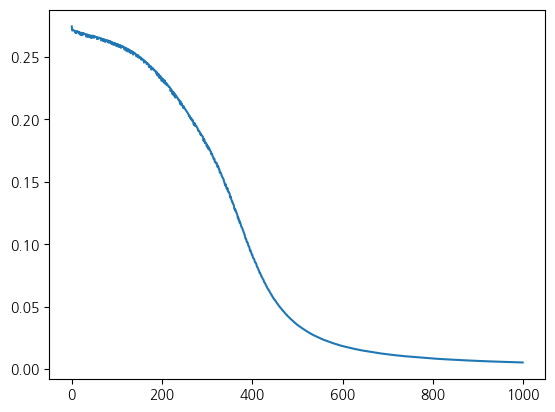

In [48]:
# 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## 테스트 단일 신경망

keras 로 하나의 Dense 출력층만 구성해 테스트해보자

In [ ]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3), loss='mse')

In [ ]:
history2 = model2.fit(x, y, epochs=1000, batch_size=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2644 
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2206
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2433
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2395
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3104
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2469
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2390
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2751
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2905
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2571
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2596
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2412
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2889
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2521
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2545
Epo

학습중 loss 가 어느 수준에서 더 떨어지지 않는 것을 보고, 예측을 수행하면 성능이 안나오는 것을 알 수 있다.

In [ ]:
model2.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


array([[0.48828277],
       [0.49649855],
       [0.4993625 ],
       [0.5075798 ]], dtype=float32)

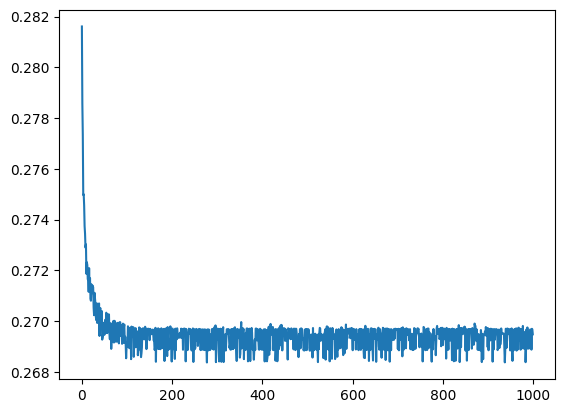

In [ ]:
plt.plot(history2.history['loss'])

---